In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')[0:-1])+'/data'

print(datadir)

/Users/ahn-eunjoo/data


In [2]:
data = pd.read_csv('survey_responses_2019_enjoo ahn.csv',header =0 ,sep =',')
data

,id,cs_python,cs_java,cs_c,cs_perl,cs_javascript,cs_r,cs_sas,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,len_answer,experience_coded,experience
0,1,1,1,1,0,0,1,0,8,9,9,9,9,5,9,774,1,"None, I just finished my undergrad!"
1,2,1,1,1,0,0,0,0,6,8,6,6,6,3,8,1584,1,"None, I just finished my undergrad!"
2,3,1,0,0,0,0,1,0,5,2,6,7,5,3,7,501,1,"None, I just finished my undergrad!"
3,4,1,1,0,0,0,1,0,7,5,7,3,3,1,7,528,2,"< 2 years, I'm fresh!"
4,5,1,0,0,0,1,1,1,7,5,5,6,5,7,7,715,3,"2-5 years, I'm getting good at what I do!"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,1,0,0,0,0,1,0,7,7,9,7,8,1,5,485,1,"None, I just finished my undergrad!"
159,160,1,0,0,0,0,1,0,5,2,4,5,6,8,9,118,4,"5+ years, I'm a veteran!"
160,161,1,0,1,0,0,1,0,5,3,6,5,1,1,5,736,2,"< 2 years, I'm fresh!"
161,162,1,0,0,0,0,0,0,3,2,8,5,1,1,7,206,1,"None, I just finished my undergrad!"


In [3]:
data.columns


Index(['id', 'cs_python', 'cs_java', 'cs_c', 'cs_perl', 'cs_javascript',
       'cs_r', 'cs_sas', 'profile_1', 'profile_2', 'profile_3', 'profile_4',
       'profile_5', 'profile_6', 'profile_7', 'len_answer', 'experience_coded',
       'experience'],
      dtype='object')

In [4]:
profile_mapping={1:'Viz',
                2:'Cs',
                3:'Math',
                4:'Stat',
                5:'ML',
                6:'Bus',
                7:'Com'}

In [5]:
data.columns

Index(['id', 'cs_python', 'cs_java', 'cs_c', 'cs_perl', 'cs_javascript',
       'cs_r', 'cs_sas', 'profile_1', 'profile_2', 'profile_3', 'profile_4',
       'profile_5', 'profile_6', 'profile_7', 'len_answer', 'experience_coded',
       'experience'],
      dtype='object')

In [6]:
newcols=[]

for colnames in data.columns:
    
    if colnames[0:7] =='profile':
       
        newcols.append('profile_{}'.format(profile_mapping[int(colnames[-1])]))
        
    else:
        newcols.append(colnames)
data.columns = newcols
#I'm confused the reversed order
data.columns

Index(['id', 'cs_python', 'cs_java', 'cs_c', 'cs_perl', 'cs_javascript',
       'cs_r', 'cs_sas', 'profile_Viz', 'profile_Cs', 'profile_Math',
       'profile_Stat', 'profile_ML', 'profile_Bus', 'profile_Com',
       'len_answer', 'experience_coded', 'experience'],
      dtype='object')

In [7]:
data.rename(columns={'profile_1':'Viz', 'profile_2':'Cs','profile_3':'Math','profile_4':'Stat','profile_5':'ML','profile_6':'Bus','profile_7':'Com'}, inplace=True)
print("After renaming:\n",data)

After renaming:
       id  cs_python  cs_java  cs_c  cs_perl  cs_javascript  cs_r  cs_sas  \
0      1          1        1     1        0              0     1       0   
1      2          1        1     1        0              0     0       0   
2      3          1        0     0        0              0     1       0   
3      4          1        1     0        0              0     1       0   
4      5          1        0     0        0              1     1       1   
..   ...        ...      ...   ...      ...            ...   ...     ...   
158  159          1        0     0        0              0     1       0   
159  160          1        0     0        0              0     1       0   
160  161          1        0     1        0              0     1       0   
161  162          1        0     0        0              0     0       0   
162  163          1        1     0        0              0     1       0   

     profile_Viz  profile_Cs  profile_Math  profile_Stat  profile_ML  

In [8]:
data.len_answer

0       774
1      1584
2       501
3       528
4       715
       ... 
158     485
159     118
160     736
161     206
162     527
Name: len_answer, Length: 163, dtype: int64

(array([16., 47., 46., 28.,  6.,  7.,  7.,  3.,  2.,  1.]),
 array([   0. ,  190.1,  380.2,  570.3,  760.4,  950.5, 1140.6, 1330.7,
        1520.8, 1710.9, 1901. ]),
 <BarContainer object of 10 artists>)

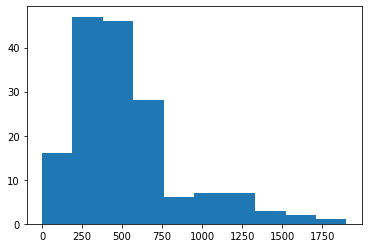

In [9]:
#Student - build and plot a histogram here
plt.hist(data.len_answer)

In [10]:
data.len_answer.describe()

count     163.000000
mean      523.478528
std       348.918087
min         0.000000
25%       281.000000
50%       471.000000
75%       648.000000
max      1901.000000
Name: len_answer, dtype: float64

In [11]:
#Let's consider cleaning up the data. We'll remove the top k values as well as those with a length less than 50 (which we think is a generous minimum to communicate a reasonable answer.
#Create a new data_frame that removes these outliers.



#Write a function to get the kth largest value of an array
def get_kth_largest(inarray, k):
    inarray.sort()
    return inarray[-k]

k = 3
kth_largest = get_kth_largest(data.len_answer.values, 3)
#Question = why did we wrap the series into an np.array() call in the above function call?

#Student create a filtered data frame here
outlier_filter = (data.len_answer > 50) & (data.len_answer < kth_largest)
data_clean = data[outlier_filter]

#Compare the shape of both dataframes
data_clean.shape, data.shape

((155, 18), (163, 18))

In [18]:
data_clean_grouped = data_clean[['len_answer','experience']].groupby(['experience']).agg(['mean','std','count'])
data_clean_grouped

len_answer                  
                                                 mean         std count
experience                                                             
2-5 years, I'm getting good at what I do!  436.677419  218.647416    31
5+ years, I'm a veteran!                   474.076923  344.158990    13
< 2 years, I'm fresh!                      543.465116  339.700453    43
None, I just finished my undergrad!        544.764706  298.916707    68

In [12]:
def get_kth_largest(inarray,k):
    inarray.sort()
    return inarray[-k]


k=3
kth_largest=get_kth_largest(data.len_answer.values,k)
data_clean=data[(data.len_answer>50) & (data.len_answer<kth_largest)]

data_clean.shape
data.shape

(163, 18)

In [25]:
from scipy.stats import norm

def pvalue_diffmean_twotail(mu1,sig1,n1,mu2,sig2,n2):
    diff=mu1-mu2
    stderror=np.sqrt(sig1**2/n1+sig2**2/n2)
    t=diff/stderror
    p_value=2*(1-norm.cdf(np.abs(t)))
    
    
    return(t,p_value)


In [26]:
ttest_data=data_clean_grouped
grps=ttest_data.index.values

for i,grp1 in enumerate(grps):
    for grp2 in grps[i+1:]:
        row1=ttest_data.loc[grp1].loc['len_answer']
        row2=ttest_data.loc[grp2].loc['len_answer']
        
        tstat, p_value=pvalue_diffmean_twotail(row1['mean'],row1['std'],
                                               row1['count'],row2['mean'],row2['std'],row2['count'])
        print("Two tailed T-test between groups:{} and {}".format(grp1,grp2))
        print("Diff={} character".format(round(row1['mean']-row2['mean'])))
        print("The tstat is {} and pvalue is {}".format(round(tstat,3),round(p_value,3)))

Two tailed T-test between groups:2-5 years, I'm getting good at what I do! and 5+ years, I'm a veteran!
Diff=-37 character
The tstat is -0.362 and pvalue is 0.717
Two tailed T-test between groups:2-5 years, I'm getting good at what I do! and < 2 years, I'm fresh!
Diff=-107 character
The tstat is -1.643 and pvalue is 0.1
Two tailed T-test between groups:2-5 years, I'm getting good at what I do! and None, I just finished my undergrad!
Diff=-108 character
The tstat is -2.022 and pvalue is 0.043
Two tailed T-test between groups:5+ years, I'm a veteran! and < 2 years, I'm fresh!
Diff=-69 character
The tstat is -0.639 and pvalue is 0.523
Two tailed T-test between groups:5+ years, I'm a veteran! and None, I just finished my undergrad!
Diff=-71 character
The tstat is -0.692 and pvalue is 0.489
Two tailed T-test between groups:< 2 years, I'm fresh! and None, I just finished my undergrad!
Diff=-1 character
The tstat is -0.021 and pvalue is 0.984
